<a href="https://colab.research.google.com/github/ankit-singh973/Deep_Learning/blob/main/4_Pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Get data**
Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class

Our dataset starts with 3 classes of food and only 10% of the images

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

The whole point is to speed up how fast we can experiment.

In [1]:
import requests
import zipfile
from pathlib import Path
import torch
from torch import nn

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Unzip pizza, steak, sushi data
with zipfile.ZipFile("/content/drive/MyDrive/Deep_Learning_in_PyTorch/pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

Unzipping pizza, steak and sushi data...


# 2. **Data Prepration and Exploration😉**

In [4]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning it's contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train
There are 0 directories and 150 images in 'data/pizza_steak_sushi/train/sushi
There are 0 directories and 154 images in 'data/pizza_steak_sushi/train/pizza
There are 0 directories and 146 images in 'data/pizza_steak_sushi/train/steak
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test
There are 0 directories and 46 images in 'data/pizza_steak_sushi/test/sushi
There are 0 directories and 46 images in 'data/pizza_steak_sushi/test/pizza
There are 0 directories and 58 images in 'data/pizza_steak_sushi/test/steak


In [6]:
# Setup train and test path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## **2.1 Visualize Images😁😁😁**

### **Warning: The downside of working with food data is it does make you little bit hungry😋😋**



pizza
Random image path: data/pizza_steak_sushi/train/pizza/2019441.jpg
Image class: pizza
Image height: 512
Image width: 512


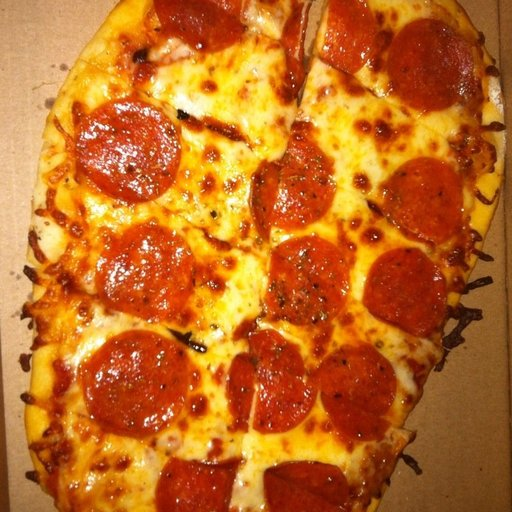

In [7]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get images
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image
random_image_path = random.choice(image_path_list)


# 3. Get image class from path name (image class is the name of the directory in which image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

Text(0.5, 1.0, 'Image class: pizza | image shape: (512, 512, 3)')

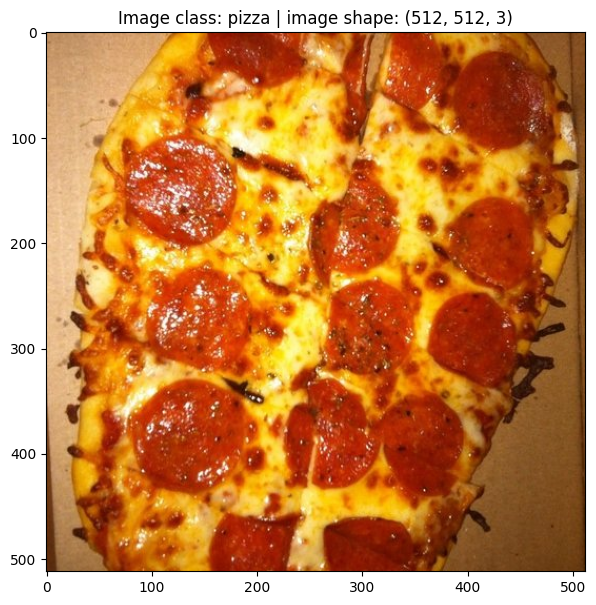

In [8]:
# Visualize image with matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into array
img_as_array  = np.array(img)

# plot the image with matplotlib
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | image shape: {img_as_array.shape}")

# **3. Turning Images into Tensors👻**
Before we can use our image data with PyTorch:

> Turn our target data into tensors (in our case, numerical representation of our images).

> Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these Dataset and DataLoader.

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
# Write a transform for image
data_transform = transforms.Compose([
  # Resize our images to 64x64
  transforms.Resize(size=(64, 64)),
  # Flip the images randomly on the horizontal (this comes under data agumentation)
  transforms.RandomHorizontalFlip(p=0.5),
  # Turn the image into a torch.Tensor
  transforms.ToTensor()
])

In [11]:
data_transform(img)

tensor([[[0.7451, 0.7490, 0.7529,  ..., 0.5255, 0.4784, 0.5176],
         [0.7569, 0.7647, 0.7686,  ..., 0.5373, 0.4863, 0.5216],
         [0.7765, 0.7765, 0.7765,  ..., 0.5451, 0.4902, 0.5176],
         ...,
         [0.3882, 0.5804, 0.6510,  ..., 0.4314, 0.4353, 0.4039],
         [0.3765, 0.5490, 0.6275,  ..., 0.4235, 0.4314, 0.3922],
         [0.3608, 0.5176, 0.5961,  ..., 0.4157, 0.4118, 0.3804]],

        [[0.5569, 0.5608, 0.5686,  ..., 0.3216, 0.2784, 0.3059],
         [0.5686, 0.5765, 0.5843,  ..., 0.3294, 0.2824, 0.3098],
         [0.5882, 0.5882, 0.5882,  ..., 0.3373, 0.2824, 0.3059],
         ...,
         [0.2039, 0.4039, 0.4745,  ..., 0.2588, 0.2549, 0.2235],
         [0.1922, 0.3725, 0.4549,  ..., 0.2510, 0.2471, 0.2196],
         [0.1804, 0.3490, 0.4314,  ..., 0.2392, 0.2353, 0.2118]],

        [[0.3765, 0.3804, 0.3882,  ..., 0.1412, 0.1098, 0.1255],
         [0.3882, 0.3961, 0.4039,  ..., 0.1490, 0.1176, 0.1294],
         [0.4039, 0.4039, 0.4078,  ..., 0.1529, 0.1176, 0.

In [12]:
data_transform(img).shape # now we'll have image in format [channel, height, width]

torch.Size([3, 64, 64])

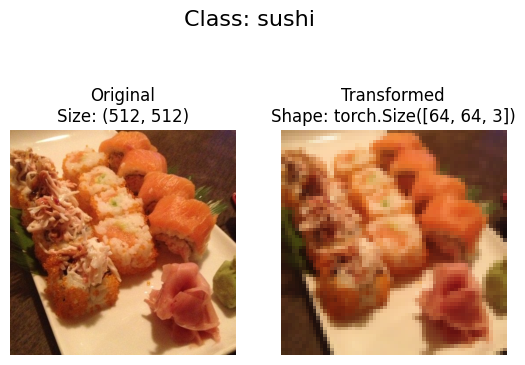

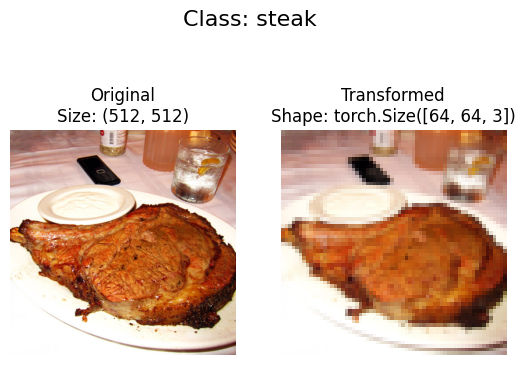

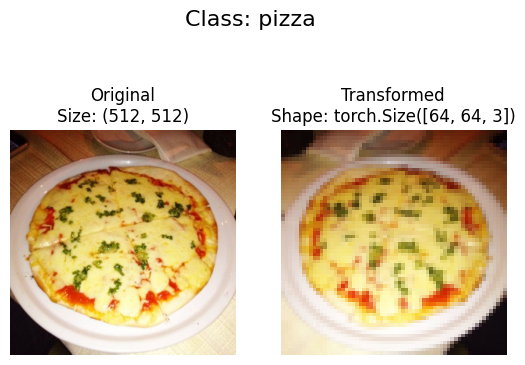

In [13]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # we need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

# **4. Option-1: Loading image data using `ImageFolder`**

In [14]:
# use ImageFolder to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform, # tranfrom for the data
                                  target_transform = None) # transform for the lables (target)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
# get class names in form of list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# chack the length of our dataset
len(train_data), len(test_data)

(450, 150)

In [18]:
# Index on train_data dataset to get single image and label(target)

img, label = train_data[0]
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

## **4.1 turn loaded images into `DataLoader`**

In [19]:
# turn train and test datasets into DataLoader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(15, 5)

In [20]:
img, label = next(iter(train_dataloader))

print(f"image shape: {img.shape}") #[batch_size, color_channels, height, width]
print(f"label shape: {label.shape}")

image shape: torch.Size([32, 3, 64, 64])
label shape: torch.Size([32])


## **Option-2: Load image data with a custom `Dataset`**

In [21]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

We want a function to:

1. Get the class names using os.scandir() to traverse a target directory (ideally the directory is in standard image classification format).

2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).

3. Turn the class names into a dict and a list and return them.

In [22]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [23]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [24]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [25]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### **Create a custom Dataset to replicate ImageFolder**

To create our own custom dataset, we havr to:

1. Subclass torch.utils.data.Dataset
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
    * paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to load_images(), this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index

In [26]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [27]:
img, label = train_data[0]

In [28]:
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [29]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()
])


In [30]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)


In [31]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7a779754a5c0>,
 <__main__.ImageFolderCustom at 0x7a779754be80>)

In [32]:
len(train_data), len(train_data_custom)

(450, 450)

In [33]:
len(test_data), len(test_data_custom)


(150, 150)

In [34]:
train_data_custom.classes


['pizza', 'steak', 'sushi']

In [35]:
train_data_custom.class_to_idx


{'pizza': 0, 'steak': 1, 'sushi': 2}

In [36]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


## **Create a function to display random images**
1. Take in a Dataset and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes and plot them with matploltib.
7. Make sure the dimensions of our images line up with matplotlib (HWC)

In [37]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

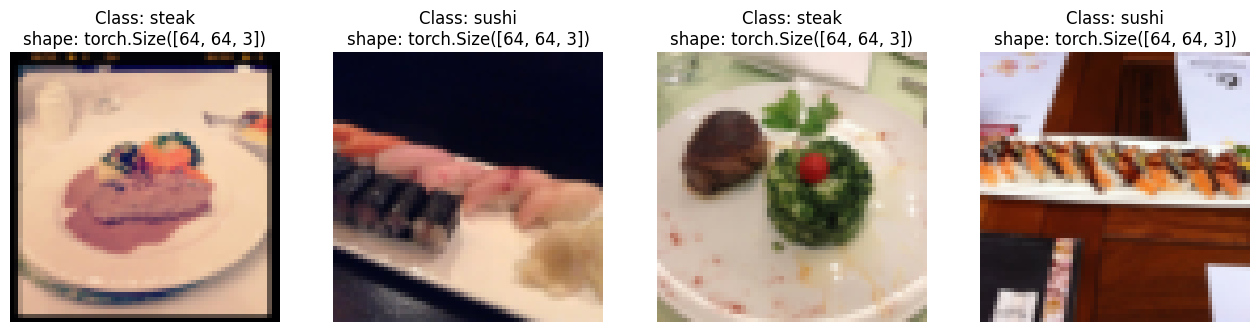

In [38]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=4,
                      classes=class_names,
                      seed=None)

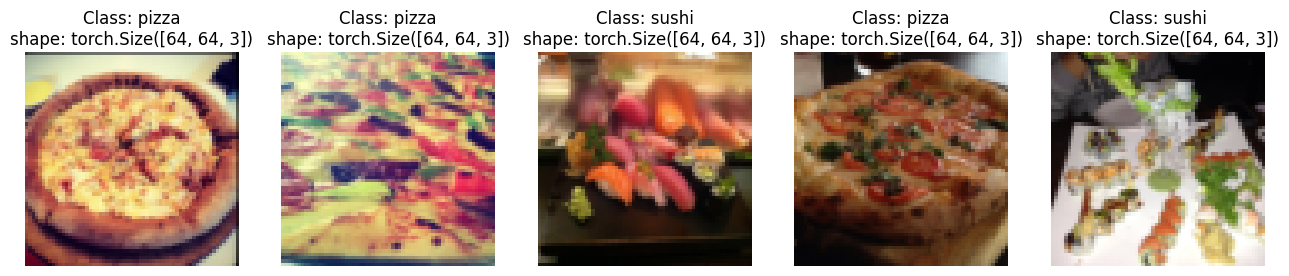

In [39]:
# Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

## **Turn custom loaded images into DataLoader**

In [40]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle = True)

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = 0)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a77970cabc0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a77970789a0>)

In [41]:
#  get image and label from custom datalaoder
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## **Data Agumentation😎😎**
* Looking at the same image from different perspectives to artifically increase diversity of data.
*

In [42]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size = (224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                                      transforms.ToTensor()])

test_transofrm = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor()
])


In [43]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/sushi/865839.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2021381.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1168726.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1138695.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1422524.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1575445.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1232045.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/155981.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2692550.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1129338.jpg')]

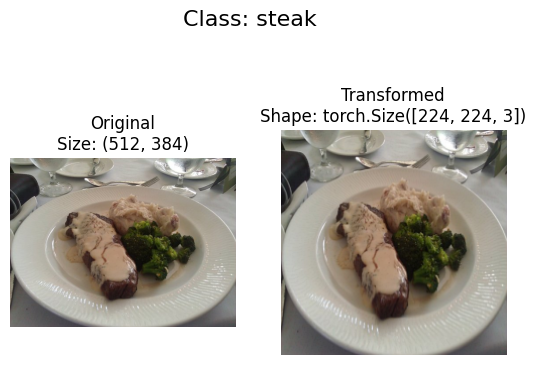

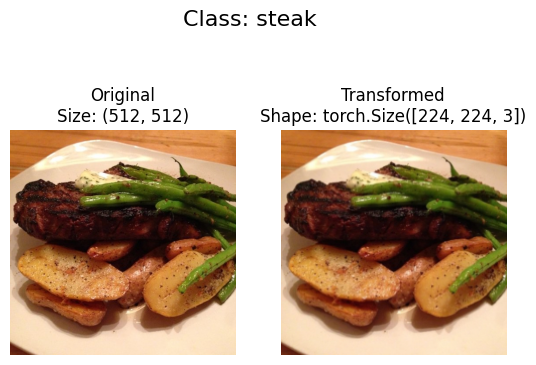

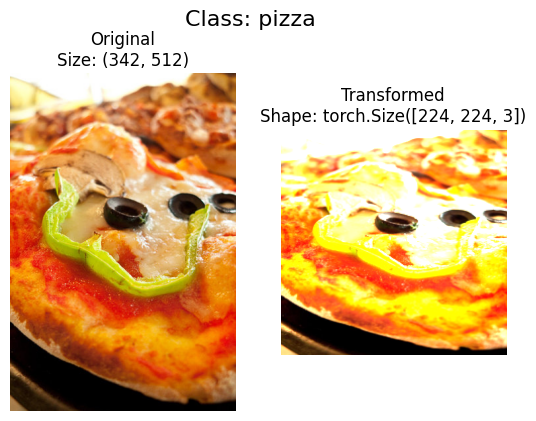

In [44]:
# plot random transformed images
plot_transformed_images(image_paths = image_path_list,
                        transform = train_transform,
                        n = 3,
                        seed = None)

# **5. MODEL BUILDING 🤩😝👻**

## **5.1 Model 0: TinyVGG without data augmentation**

In [45]:
# create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [46]:
# Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

# turn datasets into dataloaders
import os
from torch.utils.data import DataLoader

# setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create dataloaders
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers= NUM_WORKERS)

## create TinyVGG model class

In [47]:
import torch
from torch import nn

In [48]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape:int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*13*13,
                      out_features = output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return(x)


In [49]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [50]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [51]:
model_0(image_batch.to(device))

tensor([[ 0.0212, -0.0040,  0.0116],
        [ 0.0190, -0.0012,  0.0085],
        [ 0.0224, -0.0014,  0.0080],
        [ 0.0206, -0.0046,  0.0091],
        [ 0.0220, -0.0016,  0.0100],
        [ 0.0195,  0.0004,  0.0091],
        [ 0.0230, -0.0043,  0.0122],
        [ 0.0182,  0.0006,  0.0116],
        [ 0.0200,  0.0003,  0.0093],
        [ 0.0200,  0.0005,  0.0105],
        [ 0.0212, -0.0030,  0.0087],
        [ 0.0205, -0.0024,  0.0106],
        [ 0.0206, -0.0038,  0.0112],
        [ 0.0191, -0.0022,  0.0070],
        [ 0.0214, -0.0030,  0.0086],
        [ 0.0169,  0.0044,  0.0053],
        [ 0.0243, -0.0032,  0.0113],
        [ 0.0220,  0.0004,  0.0114],
        [ 0.0183,  0.0006,  0.0094],
        [ 0.0203,  0.0026,  0.0086],
        [ 0.0207, -0.0012,  0.0097],
        [ 0.0208, -0.0029,  0.0089],
        [ 0.0198, -0.0023,  0.0090],
        [ 0.0203, -0.0028,  0.0091],
        [ 0.0191, -0.0002,  0.0105],
        [ 0.0210, -0.0054,  0.0107],
        [ 0.0207,  0.0014,  0.0075],
 

In [52]:
!pip install torchinfo

In [53]:
from torchinfo import summary
summary(model_0, input_size = [32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

## **Create train and test loops functions**

In [54]:
# create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X,y) in enumerate(dataloader):
        #send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. claculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # 6. clac accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim =1), dim =1)
        train_acc += (y_pred_class ==y).sum().item()/len(y_pred)

    train_loss = train_loss/ len(dataloader)
    train_acc = train_acc/ len(dataloader)
    return train_loss, train_acc

In [55]:
# create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):

    # put model eval model
    model.eval()

    # setup loss and test accuracy values
    test_loss, test_acc = 0, 0

    # turn on inference mode
    with torch.inference_mode():
        #loop through dataloader batches
        for batch, (X, y) in enumerate(dataloader):
            #send data to target device
            X, y = X.to(device), y.to(device)

            # 1. forward pass
            test_pred_logits = model(X)

            # 2. Calculate the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate the accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


In [56]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

## **Train and evaluate model_0**

In [58]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1047 | Train acc: 0.3146 | Test loss: 1.0972 | Test acc: 0.2875
Epoch: 1 | Train loss: 1.0886 | Train acc: 0.4000 | Test loss: 1.0740 | Test acc: 0.4290
Epoch: 2 | Train loss: 1.0554 | Train acc: 0.4938 | Test loss: 1.0409 | Test acc: 0.4727
Epoch: 3 | Train loss: 0.9824 | Train acc: 0.5333 | Test loss: 0.9783 | Test acc: 0.5392
Epoch: 4 | Train loss: 0.9820 | Train acc: 0.4813 | Test loss: 0.9345 | Test acc: 0.5568
Total training time: 9.895 seconds


In [59]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

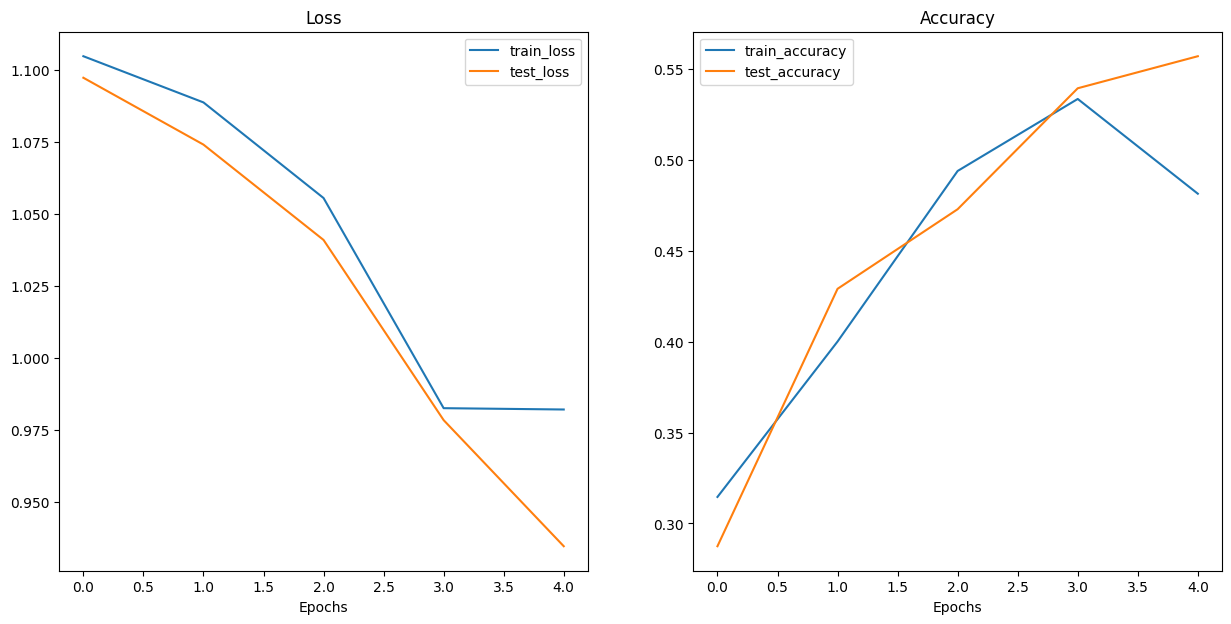

In [60]:
plot_loss_curves(model_0_results)

# **6. MODEL_1: TinyVGG with Data Augmentation**

## **6.1 Create transform with Data Augmentation**

In [61]:
# Create training transform with TrivialAugment
from torchvision import transforms

train_transfrom_trivial = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

## **9.2 Create train and test dataset's `Dataloader` with data augmentation**

In [62]:
# turn image folders into datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root = train_dir,
                                            transform = train_transfrom_trivial)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = test_transform_simple)


In [63]:
# Trun our datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(
    dataset = train_data_augmented,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)

## **9.3 Construct and train model 1**

In [64]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [65]:
# loss function
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
NUM_EPOCHS = 5

#setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.001)

start_time = timer()

# Train model_1
model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS,
                        device = device)

end_time = timer()
print(f"total training time for model-1: {end_time-start_time:3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1024 | Train acc: 0.3083 | Test loss: 1.1021 | Test acc: 0.2875
Epoch: 1 | Train loss: 1.0972 | Train acc: 0.3771 | Test loss: 1.0865 | Test acc: 0.3812
Epoch: 2 | Train loss: 1.0837 | Train acc: 0.4167 | Test loss: 1.0588 | Test acc: 0.5449
Epoch: 3 | Train loss: 1.0267 | Train acc: 0.5021 | Test loss: 1.0021 | Test acc: 0.4750
Epoch: 4 | Train loss: 0.9984 | Train acc: 0.4917 | Test loss: 0.9858 | Test acc: 0.4455
total training time for model-1: 8.452535 seconds


## **6.4 Plot the loss curves of model_1 results**

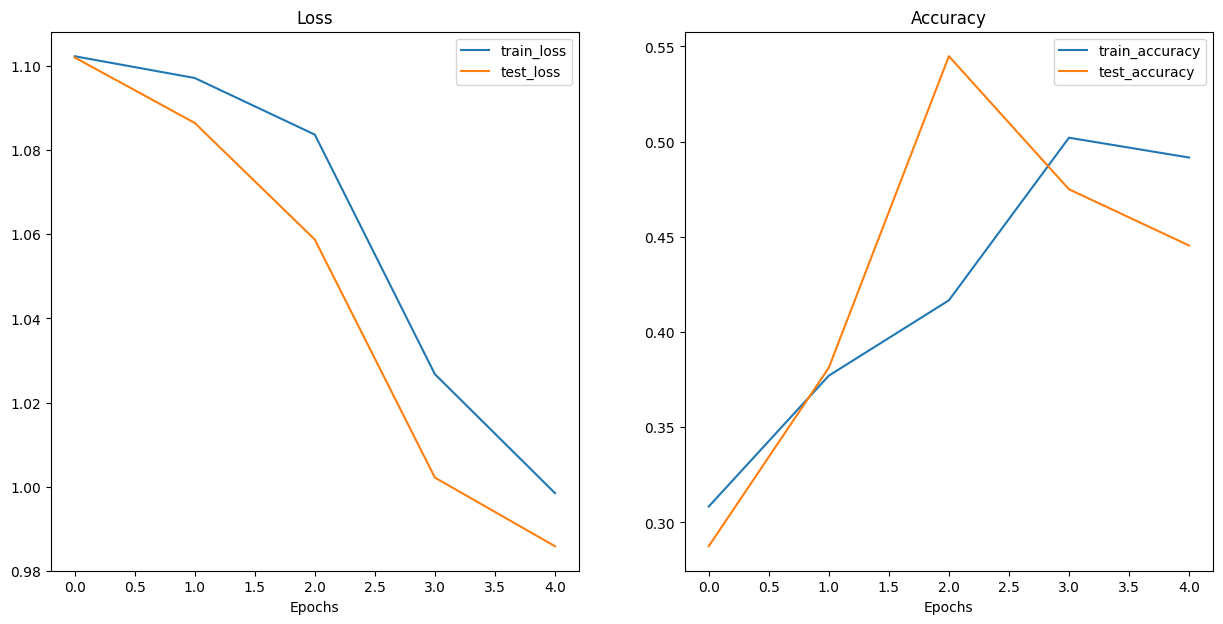

In [66]:
plot_loss_curves(model_1_results)